In [73]:
import BSModel  
import yfinance as yf 
import pandas as pd
import pandas_datareader.data as web 
import numpy as np
import matplotlib.pyplot as plt

In [74]:
%load_ext autoreload 
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Bull Call Spread

Trader buys one call option and sells another. Betting on spot price of underlying going up! 

Maximum  profit: $({K_1 - K_2}) - (C_2 - C_1)$ where $K_1 \gt K_2$

Maximum loss: $C_1 - C_2$


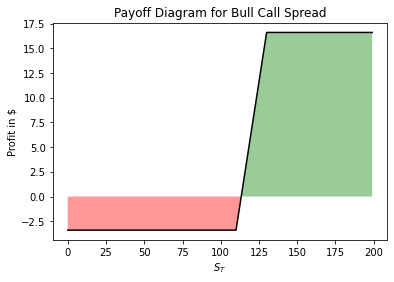

Max Profit: $16.604
Max loss: $-3.396
Cost of entering position $3.395512606331721


In [47]:
obj = BSModel.OptionStrat('Bull Call Spread', 100)

C_2 = BSModel.BSOption(100,130,1,0.01,0.25)
C_1 = BSModel.BSOption(100,110,1,0.01,0.25)

obj.short_call(130,C_2.price())
obj.long_call(110,C_1.price())
obj.plot(color='black')
obj.describe()

## Bear Call spread 

Trader sells a call option with a lower strike and buys another with a higher strike

Betting on the underlying to fall! 

Maximum profit: ${(C_1 - C_2)}$ where $C_1 \gt C_2$

Maximum loss: ${(K_1 - K_2) + (C_1 - C_2)}$

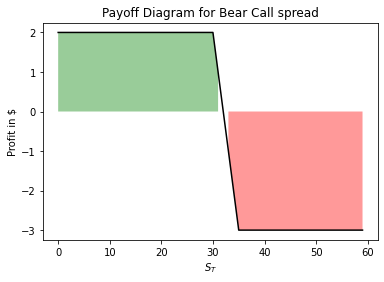

Max Profit: $2.0
Max loss: $-3.0
Cost of entering position $-2.0


In [13]:
obj1 = BSModel.OptionStrat('Bear Call spread', 30)
obj1.short_call(30,2.50)
obj1.long_call(35, 0.5)
obj1.plot(color='black')
obj1.describe()

## Bull Put spread

Trader sells a put option with a higher strike and buy another with a lower strike price

Betting on underlying to increase in value, while limiting downside! 

Maximum profit: ${(C_1 - C_2)}$ where ${(C_1 > C_2)}$

Maximum loss: ${-(K_1 - K_2) + (C_1-C_2)}$

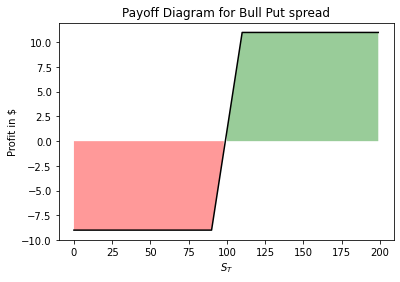

Max Profit: $11
Max loss: $-9
Cost of entering position $4


In [16]:
obj2 = BSModel.OptionStrat('Bull Put spread', 100)
obj2.long_put(90,4)
obj2.short_put(110, 15)
obj2.plot(color='black')
obj2.describe()

## Bear Put spread

Trader sells one put option with a lower strike, and buys another with a higher strike

Betting that underlying will decrease, while also having limited downside

Maximum profit: ${(K_1 - K_2) - (C_1 - C_2)}$ where $(K_1 \gt K_2)$

Maximum loss: $-(C_1 - C_2)$

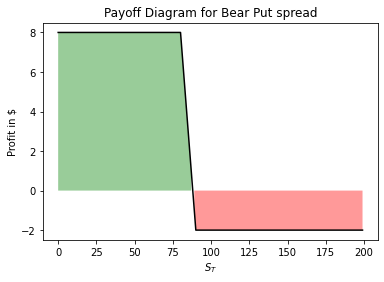

Max Profit: $8
Max loss: $-2
Cost of entering position $3


In [18]:
obj3 = BSModel.OptionStrat('Bear Put spread', 100)
obj3.long_put(90,3)
obj3.short_put(80,1)
obj3.plot(color='black')
obj3.describe()


## Straddle Strategy

Trader buys both a call and a put at the same strike! Trader will benefit from a large move in the underlying, regardsless of the direction of the move! 

### Long Straddle strategy: 
 - Betting on a large move either up or down

### Short Straddle strategy:
 - Betting that underlying will stay more or less the same

### Long Straddle strategy! 

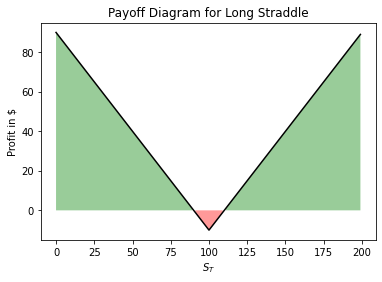

In [41]:
longStraddle = BSModel.OptionStrat('Long Straddle',100)
longStraddle.long_put(100,5)
longStraddle.long_call(100,5)
longStraddle.plot(color='black')

### Short Straddle strategy! 

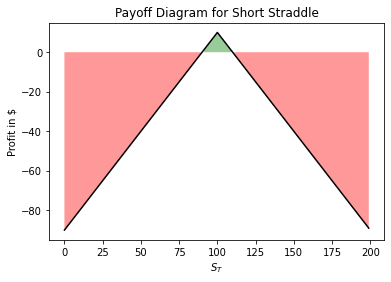

In [42]:
shortStraddle = BSModel.OptionStrat('Short Straddle', 100)
shortStraddle.short_put(100,5)
shortStraddle.short_call(100,5)
shortStraddle.plot(color='black')

## Butterfly Strategy 

Trader bets that underlying stays around the same level! 

Buy 1 deep ITM call, and 1 OTM call! To balance the long call positions, trader would sell 2 options at the same strike!

Limited downside should the underlying move strongly in either direction! 

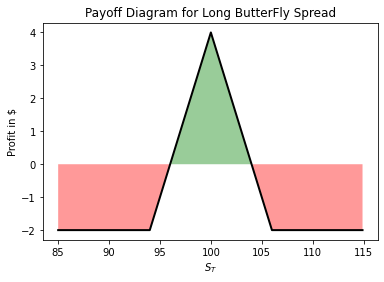

Max Profit: $4.0
Max loss: $-2.0
Cost of entering position $2


In [43]:
### Long Butterfly strategy

longBFLY = BSModel.OptionStrat('Long ButterFly Spread', 100, {'start': 85, 'stop':115, 'by':0.1})
longBFLY.long_call(94,8,1)
longBFLY.long_call(106,2,1)
longBFLY.short_call(100,4,2)
longBFLY.plot(color='black', linewidth=2)
longBFLY.describe()

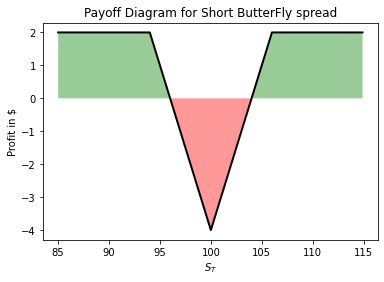

Max Profit: $2.0
Max loss: $-4.0
Cost of entering position $-2


In [44]:
### Short Butterfly strategy

shortBFLY = BSModel.OptionStrat('Short ButterFly spread', 100, {'start': 85, 'stop':115, 'by':0.1})
shortBFLY.short_call(94,8,1)
shortBFLY.short_call(106,2,1)
shortBFLY.long_call(100,4,2)
shortBFLY.plot(color='black', linewidth=2)
shortBFLY.describe()

## Strangle Strategy

Trader takes position that will profit from a large change in the underlying price! 

The strikes of the two options are different!

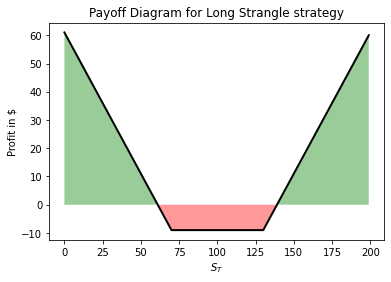

Max Profit: $61
Max loss: $-9
Cost of entering position $9


In [45]:
### Long strangle

longStrangle = BSModel.OptionStrat('Long Strangle strategy', 100)
longStrangle.long_call(130,4,1)
longStrangle.long_put(70,5,1)
longStrangle.plot(color='black', linewidth=2)
longStrangle.describe()

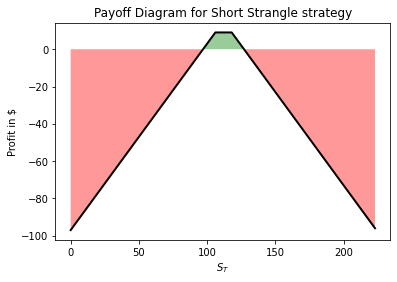

Max Profit: $9
Max loss: $-97
Cost of entering position $-4


In [47]:
### Short strangle 
shortStrangle = BSModel.OptionStrat('Short Strangle strategy', 112)
shortStrangle.short_call(118,4,1)
shortStrangle.short_put(106,5,1)
shortStrangle.plot(color='black', linewidth=2)
shortStrangle.describe()

## Iron Condor Strategy

Trader buys both a bull put-spread and a bear call-spread simultaneously. This is similar to a butterfly strategy, except the returns are more spread out and the maximum profit is realized at a range of stock prices at expiration. There is also limited downside, should the stock make a large move in either direction! 

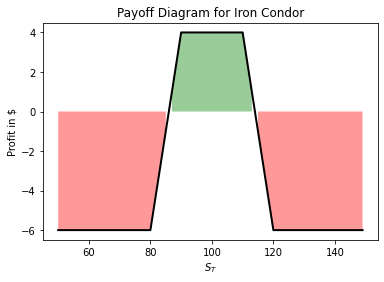

Max Profit: $4
Max loss: $-6
Cost of entering position $0


In [50]:
ironCondor = BSModel.OptionStrat('Iron Condor', 100, {'start': 50, 'stop': 150, 'by':1})
ironCondor.long_call(120, 2,1)
ironCondor.short_call(110, 4,1)
ironCondor.short_put(90,4,1)
ironCondor.long_put(80,2,1)
ironCondor.plot(color='black', linewidth=2)
ironCondor.describe()

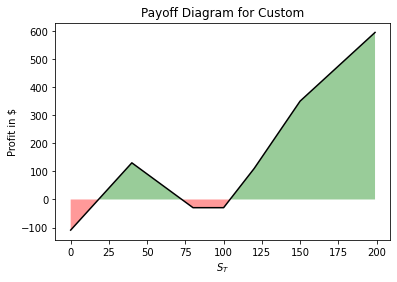

In [51]:
### Custom strategy

custom = BSModel.OptionStrat('Custom', 100)
custom.long_call(120,2,1)
custom.long_call(100,4,7)
custom.short_call(150,0.75,3)
custom.long_put(80,2,4)
custom.short_put(40,0.65,10)
custom.plot(color='black')

# Options Pricing Introduction 

## Factors affecting Option Prices

### Moneyness

Moneyness can be viewed as the current price of the underlying in relation to the strike price! This will affect calls and put differently! 

Moneyness = $\frac{S0}{K}$

#### Calls
 - has a positive relationship with moneyness, since higher price of underlying in relation to strike, indicates the option has more value! 

#### Puts 
 - Since puts benefits from a decrese in underlying, the higher the strike in relation to underlying, the higher the value of the option position!

### Volatility
Think of it as the range of potential future stock prices! Both calls and puts will benefit from an increase in volatility! 

Volatility is calculated on the returns from an underlying. Usually the period log returns ${r_i}$ are considered

${r_i} = log(S_t) - log(S_t-1)$

We can then calculate the standard deviation of returns

$\sigma = \sqrt{\frac{1}{N-1}\sum{r_i - r_avg}}$

We often need to annualize the volatilty by multiply $\sigma$ with the $\sqrt{T}$

### Time to expiration
Time has a positive relationship to both calls and puts - the further away it is, the less certain we are about the outcome! 
 - the uncertainty increases by $\sqrt{T}$ so therefore longer periods will be inherently more uncertain! 

### Interest Rates and Dividends
Commonly a government bond rate is used, which then is known as the risk-free rate! 

For dividends - increases the value of puts and decreases the value of calls! 

### Put-Call Parity

${C + K\exp^{-rT} = P + S_0}$

We can back out the interest rate implied by the option prices as follows:

r = -$\frac{\ln[\frac{S_0+P-C}{K}]}{T}$


# The Binomial Pricing Model

In [3]:
# Example of combinatorics 
import math

def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))

# # for i in range(5):
# #     print(combos(4,i))

# fair_value = 0
# n = 10

# for k in range(7,n+1):
#     fair_value += combos(n,k)*0.5**k*0.5**(n-k)*k 

# fair_value

In [4]:
#Binomial Price Function 

N = 1000
S0 = 100
T = 0.5
sigma = 0.4
K = 105
r = 0.05

def binom_EURO_opt(S0, K, T, r, sigma, N, type_ = 'call'):
    dt = T/N 
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    p = (np.exp(r*dt) - d)/(u-d)
    value = 0 
    for i in range(N+1):
        node_prob = combos(N, i)*p**i*(1-p)**(N-i)
        ST = S0*(u)**i*(d)**(N-i)
        if type_ == 'call':
            value += max(ST-K,0) * node_prob 
        elif type_ == 'put':
            value += max(K-ST,0) * node_prob 
        else:
            raise ValueError("type_ must be 'call' or 'put'")
    return value*np.exp(-r*T)

call = binom_EURO_opt(S0, K, T, r, sigma, N)
put = binom_EURO_opt(S0, K, T, r, sigma, N, type_='put')

call,put

(10.21942489213811, 12.626965655110418)

Text(0, 0.5, 'Stock Price')

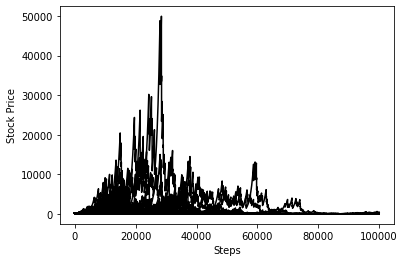

In [5]:
### Coin flip example

N=100000
sigma = 0.4
T = 0.5
K = 105 
r = 0.05
dt = T/N
Heads = np.exp(sigma * np.sqrt(dt))
Tails = np.exp(-sigma * np.exp(dt))
S0 = 100 
p = (np.exp(r*dt) - Tails) / (Heads - Tails)
paths = np.random.choice([Heads, Tails],p=[p,1-p],size=(N,1000))
plt.plot(paths.cumprod(axis=0)*100, color='black');
plt.xlabel('Steps')
plt.ylabel('Stock Price')

# Black-Scholes Model

### Black-Scholes assumptions

* Interest rate is known and constant through time
* The stock follows a random walk in continous time - the variance of the stock price path follows a log-normal dist. 
* Volatility is constant
* Stock pays no dividends 
* The option can only be exercised at expiration i.e. it i as European type
* No transaction costs i.e. fees on shorting selling 
* Fractional trading is possible i.e. we can sell/buy at fractional increments

### Effect of underlying price on option Value

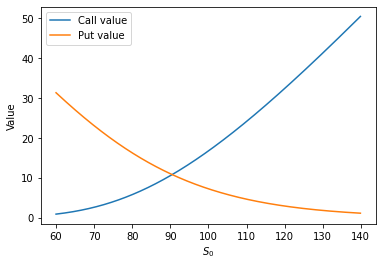

In [3]:

K = 100 
r = 0.1 
T = 1 
sigma = 0.3 
S = np.arange(60,140,0.1)

calls = [BSModel.BSOption(s,K,T,r,sigma).price('C') for s in S]
puts = [BSModel.BSOption(s,K,T,r,sigma).price('P') for s in S]

plt.plot(S, calls, label='Call value')
plt.plot(S, puts , label='Put value') 
plt.xlabel('$S_0$')
plt.ylabel('Value')
plt.legend()


### Effect of sigma on Option value

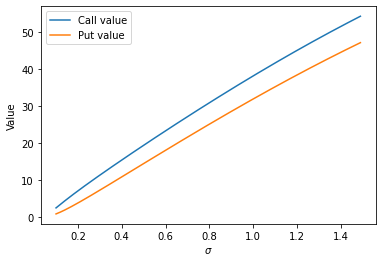

In [26]:
#For varying values of the price of the underlying
K = 100 
r = 0.1 
T = 1 
sigma = np.arange(0.1,1.5,0.01) 
S = 100

calls = [BSModel.BSOption(S,K,T,r,sig).price('C') for sig in sigma]
puts = [BSModel.BSOption(S,K,T,r,sig).price('P') for sig in sigma]

plt.plot(sigma, calls, label='Call value')
plt.plot(sigma, puts , label='Put value') 
plt.xlabel('$\sigma$')
plt.ylabel('Value')
plt.legend()

### Effect of Time on Option Value

c:\Projekter\GenerelNB\Options\BSModel.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return (np.log(self.S/self.K) + (self.r - self.q + self.sigma**2/2)*self.T) / (self.sigma * np.sqrt(self.T))


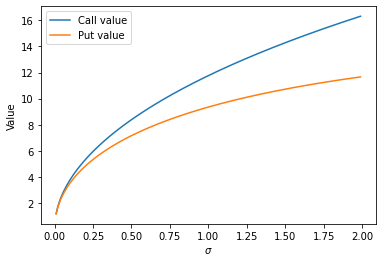

In [45]:
K = 100 
r = 0.05 
T = np.arange(0, 2, 0.01) 
sigma = 0.3 
S = 100

calls = [BSModel.BSOption(S,K,t,r,sigma).price('C') for t in T]
puts = [BSModel.BSOption(S,K,t,r,sigma).price('P') for t in T]

plt.plot(T, calls, label='Call value')
plt.plot(T, puts , label='Put value') 
plt.xlabel('$\sigma$')
plt.ylabel('Value')
plt.legend()

### Main Problems with Black-Scholes

  * Volatility of underlying is not constant! 
  * Underestimates the tail density

#### Underlying Volatility

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL Rolling Volatility')

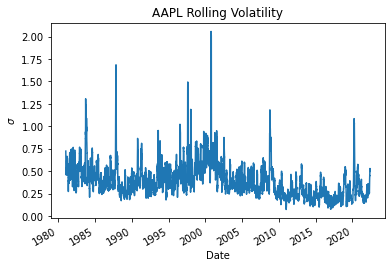

In [33]:
# Test assumptions with data

AAPL = yf.download('AAPL')
AAPL['change'] = AAPL['Close'].pct_change()
AAPL['rolling_sigma'] = AAPL['change'].rolling(20).std()*np.sqrt(255)

AAPL.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('AAPL Rolling Volatility')

#### Comparing Density distributions

Text(0, 0.5, 'Density')

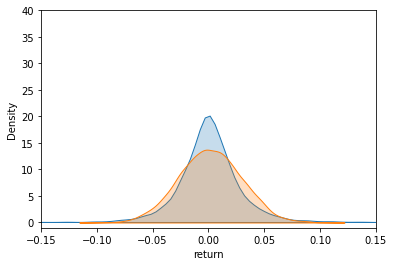

In [44]:
std = AAPL.change.std()
WT = np.random.normal(AAPL.change.mean(), std, size=10000)
# plt.hist(np.exp(WT)-1, bins=300, color='red', alpha=0.4)
# plt.hist(AAPL.change, bins=200, color='black', alpha=0.4)
# plt.xlim([-0.03,0.03])

import seaborn as sns 

fig,ax = plt.subplots()
ax = sns.kdeplot(data=AAPL['change'].dropna(), label='Empirical', ax=ax, shade=True)
ax = sns.kdeplot(data=WT, label='Log Normal', ax=ax, shade=True)
plt.xlim([-0.15,0.15])
plt.ylim([-1,40])
plt.xlabel('return')
plt.ylabel('Density')

# The Greeks by Analytic & Numerical Methods with Python

### Forward Difference

Text(0.5, 1.0, 'Forward Finite Difference')

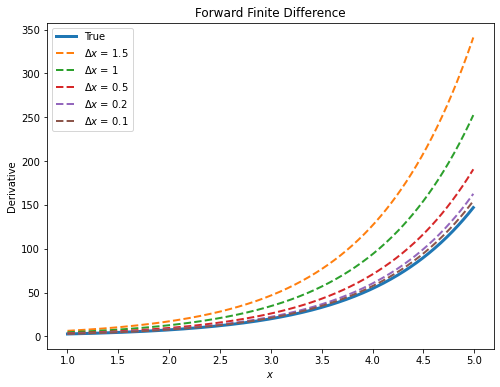

In [9]:
def f(x):
    return np.exp(x)

def forward_difference(f, x, dx):
    return (f(x+dx) - f(x)) / dx 

plt.figure(figsize=(8,6))
deltasxs = [1.5, 1, 0.5, 0.2, 0.1]
nums = np.arange(1,5,0.01)
true = f(nums)

plt.plot(nums, true, label='True', linewidth=3)

for delt in deltasxs:
    plt.plot(nums, forward_difference(f, nums, delt), label=f'$\Delta x$ = {delt}', linewidth=2, linestyle='--')

plt.legend()
plt.ylabel("Derivative")
plt.xlabel('$x$')
plt.title('Forward Finite Difference')

### Backward Difference

Text(0.5, 1.0, 'Backward Finite Difference')

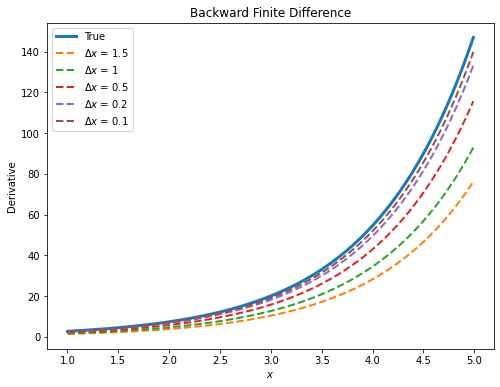

In [10]:
def backward_difference(f, x, dx):
    return (f(x) - f(x-dx)) / dx 

nums = np.arange(1,5,0.01)
true = f(nums)
plt.figure(figsize=(8, 6))
deltasxs = [1.5, 1, 0.5, 0.2, 0.1]

plt.plot(nums, true, label='True', linewidth=3)
for delt in deltasxs:
    plt.plot(nums, backward_difference(f, nums, delt), 
            label=f'$\Delta x$ = {delt}',
            linewidth=2, linestyle='--')

plt.legend() 
plt.ylabel('Derivative')
plt.xlabel('$x$')
plt.title('Backward Finite Difference')


### Central Difference

Text(0.5, 1.0, 'Central Finite Difference')

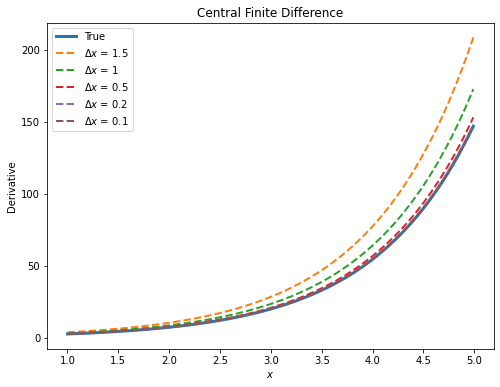

In [11]:
def central_difference(f, x, dx):
    return (f(x+dx) - f(x-dx)) / (2*dx)

plt.figure(figsize=(8,6))
deltasxs = [1.5, 1, 0.5, 0.2, 0.1]

plt.plot(nums, true, label='True', linewidth=3)
for delt in deltasxs:
    plt.plot(nums, central_difference(f, nums, delt), label=f'$\Delta x$ = {delt}', linewidth=2, linestyle='--')

plt.legend()
plt.ylabel('Derivative')
plt.xlabel('$x$')
plt.title('Central Finite Difference')


### Delta Analytic 

Delta measures the speed of change in the option for a change in the underlying! 

$\frac{\partial C}{\partial S} = N(d_1)$

$\frac{\partial P}{\partial S} = -N(-d_1)$

The delta of an option will be between [0,1] for a call option and [-1,0] for a put option

Delta is additive across different strike prices, as long as the underlying is the same, we can add deltas together

#### Delta Finite Difference

$\frac{\partial C}{\partial S}$ = $\frac{BS_{Call}(S + \delta S, K, T, r, \sigma) - BS_{Call}(S,K,T,r,\sigma)}{\Delta S}$

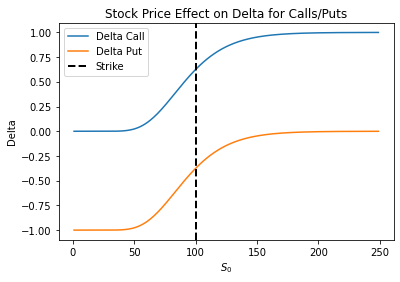

In [7]:
K = 100 
r = 0.05 
#T = np.arange(0, 2, 0.01) 
T = 1
sigma = 0.3 
S = 100

prices = np.arange(1, 250,1)

deltas_c = BSModel.BSOption(prices,K,T,r,sigma)._delta_call() 
deltas_p = BSModel.BSOption(prices,K,T,r,sigma)._delta_put()

plt.plot(prices, deltas_c, label='Delta Call')
plt.plot(prices, deltas_p, label='Delta Put')
plt.xlabel('$S_0$')
plt.ylabel('Delta')
plt.title('Stock Price Effect on Delta for Calls/Puts')
plt.axvline(K, color='black', linestyle='dashed', linewidth=2, label='Strike')
plt.legend()

### Gamma Analytic

The formula for Gamma is the same for both Puts and Calls: 

$\frac{\partial ^2 C}{\partial S^2} = \frac{\partial ^2 P}{\partial S^2} = \frac{N'(d_1)}{S\sigma\sqrt{T}}$

Gamma is thought of as being the change in Delta! 

Text(0, 0.5, 'Gamma')

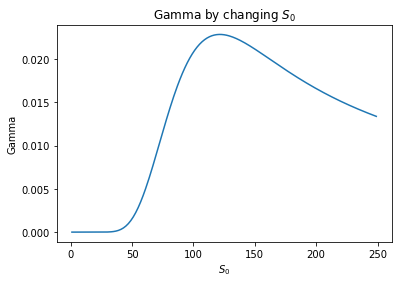

In [6]:
K = 100 
r = 0.05 
#T = np.arange(0, 2, 0.01) 
T = 1
sigma = 0.3 
S = 100
prices = np.arange(1, 250,1)

put_gammas = BSModel.BSOption(prices, K, T, r, sigma)._gamma()

plt.plot(prices, put_gammas)
plt.title('Gamma by changing $S_0$')
plt.xlabel('$S_0$')
plt.ylabel('Gamma')

### Vega Analytic 

Vega measures change in option price with respect to volatility

$\frac{\partial C}{\partial \sigma}$ = $\frac{\partial P}{\partial \sigma}$ = $S\sqrt{T}N'(d_1)$

Text(0.5, 1.0, 'Vega decrease with Time')

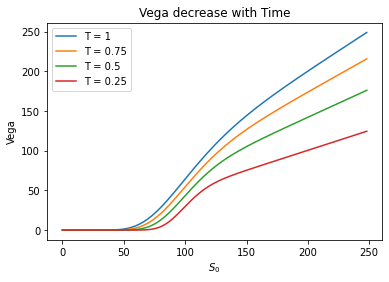

In [6]:
K = 100 
r = 0.05 
#T = np.arange(0, 2, 0.01) 
T = 1
sigma = 0.3 
S = 100
prices = np.arange(1, 250,1)

Ts = [1, 0.75, 0.5, 0.25]
for t in Ts:
    plt.plot(BSModel.BSOption(prices, K, t, r, sigma)._vega(), label=f'T = {t}')

plt.legend()
plt.xlabel('$S_0$')
plt.ylabel('Vega')
plt.title('Vega decrease with Time')



### Theta Analytic 

Theta is also known as time-decay! It measures the change of the value with respect to time

Both calls and puts will experience a decrease in value as the expiration date nears

$\frac{\partial C}{\partial T}$ = $-\frac{SN'(d_1)\sigma}{2\sqrt{T}} - rK\exp^{-rT}N(d_2)$

$\frac{\partial P}{\partial T}$ = $-\frac{SN'(d_1)\sigma}{2\sqrt{T}} + rK\exp^{-rT}N(-d_2)$

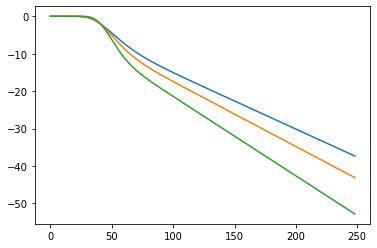

In [7]:
theta_call = [100,100,1,0.05,0.2, 0.1, 0.05]
#Ts = [1, 0.75, 0.5, 0.25, 0.1, 0.05]
Ts = [1, 0.75, 0.5]
K = 50 
r = 0.00 
#T = np.arange(0, 2, 0.01) 
T = 1
sigma = 0.3 
S = 100
prices = np.arange(1, 250,1)
for t in Ts:
    plt.plot(BSModel.BSOption(prices, K, t, r, sigma)._theta_call(), label=f'T = {t}')


### Rho Analytic 

Rho is the partial derivative of the option with respect to the risk-free rate

Rho will be positive for calls and negative for puts! 

Text(0.5, 1.0, 'Rho with Time')

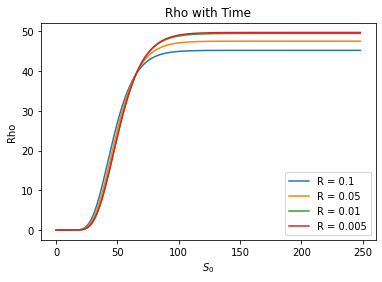

In [9]:
#theta_call = [100,100,1,0.05,0.2, 0.1, 0.05]
#Ts = [1, 0.75, 0.5, 0.25, 0.1, 0.05]
Rhos = [0.1, 0.05, 0.01,0.005]
K = 50 
r = 0.00 
#T = np.arange(0, 2, 0.01) 
T = 1
sigma = 0.3 
S = 100
prices = np.arange(1, 250,1)
for r in Rhos:
    plt.plot(BSModel.BSOption(prices, K, T, r, sigma).rho_call(), label=f'R = {r}')

plt.legend()
plt.xlabel('$S_0$')
plt.ylabel('Rho')
plt.title('Rho with Time')

# Binary Options and Implied Distributions

Binary options pays a fixed payoff if the underlying reach a certain level at expiration! 

A binary option with a payoff of 1 is also known as a _digital_

### Simulation Method

Consider an option that pays as fixed amount _x_ conditional upon some event occurring. 

Example:

An option pays $5 if underlying is greater than 115 in 3 months time! It doesn't matter if the underlying is 115, 200 etc., as long as it is above the threshold ($115) it will pay $5

Thus, it is actually like a probability question - How often would the stock finish above the strike? 

1.  Simulate $S_T$ according to Geometric Brownian Motion

$\ln(S_T) - \ln(S_0) \backsim \mathcal{N}((\mu -\frac{\sigma^2}{2})T, \sigma^2\sqrt{T}) $

${S_T}$ = ${S_0}\exp^{r-\frac{\sigma^2}{2}T+\sigma d{W_T^i}}, for  i \in [1,2,...,N]$

2. Calculate how often the underlying is greater than the strike price

$\mathcal{P}({S_T} \gt K = \frac{1}{N}\sum_{i=1}^{N}{{1_\lbrace{S_T} \gt K \rbrace}} $

3. Calculate the value of the option 

* Let Q be the payoff from the binary - the fair price is then

Binary Call Value = $\mathcal{P}({S_T} \gt K) \times Q\exp^{-rT}$

We can get the Risk-Neutral probability as: 

$\mathcal{P}({S_T} \gt K) \times \exp^{-rT}$

For puts we change to:

$\mathcal{P}({S_T} \lt K) \times \exp^{-rT}$



Text(0.5, 1.0, 'Stock Simulation')

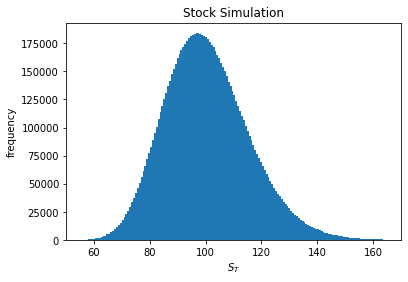

In [24]:
#Simulate 10mio terminal stock prices
S = 100.0
K = 115.0
T = 0.25
r = 0.02
sigma = 0.3 
Ndraws = 10_000_000  

np.random.seed(0)
dS  = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T), size=Ndraws)
ST  = S * np.exp(dS)

n, bins, patches = plt.hist(ST,bins=250)
plt.xlabel('$S_T$')
plt.xlim([50,170])
plt.ylabel('frequency')
plt.title('Stock Simulation')

The option was in the money, 1651856 times
Out of 10000000 simulations
Probability of being in the money 0.1651856%


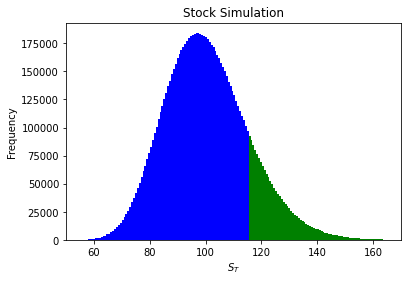

In [25]:
# Percentage of draws when underlying greater than strike

n_1, bins_1, patches_1 = plt.hist(ST,bins=250)
plt.xlabel('$S_T$')
plt.xlim([50,170])
plt.ylabel('Frequency')
plt.title('Stock Simulation')
for c,p in zip(bins_1, patches_1): 
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'blue')

timesITM = len(ST[ST>K])
P = timesITM/Ndraws
print(f'The option was in the money, {timesITM} times')
print(f'Out of {Ndraws} simulations')
print(f'Probability of being in the money {P}%')




In [30]:
# Valueing binaries with varying parameters 

def monte_carlo_binary(S, K, T, r, sigma, Q, type_='call', Ndraws=10_000_000, seed=0):
    np.random.seed(seed)
    dS = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T),size=Ndraws)
    ST = S * np.exp(dS)
    if type_ == 'call':
        return len(ST[ST>K])/Ndraws * Q * np.exp(-r*T)
    elif type_ == 'put':
        return len(ST[ST<K])/Ndraws * Q * np.exp(-r*T)
    else: 
        raise ValueError('Type must be put or call')

monte_carlo_binary(S, K, T, r, sigma, 5)


0.8218086669146537

### Black-Scholes Closed Form 

Call formula: 

$Q\exp^{-rT}N(d_2)$

Put formula: 

$Q\exp^{-rT}N(-d_2)$

Since we know that the problem is binary, one of the two events must occur! - the stock is either above the strike or below it! 

Therefore the following relationship must hold: 

$\mathcal{P}(S_T \gt K)$ + ${\mathcal{P}(S_T \lt K)} = 1$ 

For risk-neutrality we can state the equality: 

$\exp^{rT}(C_k + P_k) = 1$ 

And then it follows that to price a non-digital binary: 

$\exp^{rT}(C_k + P_k) = Q$

Once we know the price of a binary call we can then infer the price of the output: 

$\mathcal{P_k} = \exp^{-rT}Q-C_k$

In [41]:
#BS Call and Put formula for binary option

from scipy.stats import norm

def d2(S, K, T, r, sigma):
    return (np.log(S/K) + (r-sigma**2/2)*T) / (sigma*np.sqrt(T))

def binary_call(S, K, T, r, sigma, Q=1):
    N = norm.cdf
    return np.exp(-r*T)*N(d2(S,K,T,r,sigma))*Q

def binary_put(S, K, T, r, sigma, Q=1):
    N = norm.cdf
    return np.exp(-r*T)*N(-d2(S,K,T,r,sigma))*Q



#Probability of ending ITM
#binary_call(S, K, T, r, sigma, Q=1)*np.exp(r*T)
#binary_put(S, K, T, r, sigma, Q=1)*np.exp(r*T)

#Price of Binary
#binary_call(S, K, T, r, sigma, Q=5)
#binary_put(S, K, T, r, sigma, Q=5)

4.153311176925954

### Implied Probability Distribution from Market Data 

Remember the following points: 

* $N(d_1)$ represents the risk neutral probability of the stock being above the strike at expiration
* $N(-d_2)$ is the risk neutral probability of the stock finishing below the strike at expiration

Notes on the data for this part: 

* Data from yfinance prior to december, 2020
* All options expire on Feb, 19th 2021
* T = #days/255
* Rf = 0.001 pa. 

In [43]:
#Import data for analysis
df = pd.read_csv('https://raw.githubusercontent.com/codearmo/data/master/implied_dist_article.csv')
df.head()

,K,IV,S,T
0,55,1.017583,131.97,0.207843
1,60,0.923829,131.97,0.207843
2,65,0.871095,131.97,0.207843
3,70,0.802736,131.97,0.207843
4,75,0.736331,131.97,0.207843


#### Interpolate and Extrapolate Implied Volatility

Text(0, 0.5, 'Implied Vol')

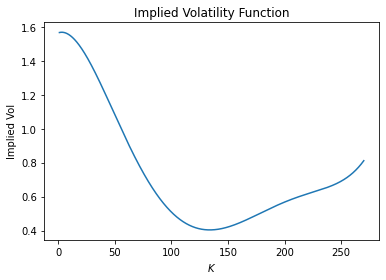

In [44]:
vols = df.IV.values 
Ks = df.K.values 

newK = np.arange(1,270, 0.0001)

poly = np.polyfit(Ks, vols, 5)
newVols = np.poly1d(poly)(newK)

plt.plot(newK, newVols)
plt.title('Implied Volatility Function')
plt.xlabel('$K$')
plt.ylabel('Implied Vol')

#### Create Risk Neutral Cumulative Distribution Function for Stock Price at Expiration

To create a cdf we want to calculate the weight to the left of the given point - the strike! 

We know how to calculate this by using the digital put option! 

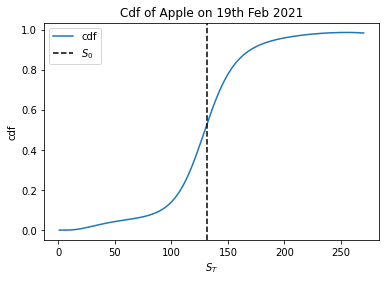

In [45]:
S = df.S[0] #Extract S_0
T = df['T'][0] #Extract T
r = 0.001 #Chosen for convenience

binaries = binary_put(S, newK, T, r, newVols)

plt.plot(newK, binaries, label='cdf')
plt.axvline(S, color='black', linestyle='--', label='$S_0$')
plt.xlabel('$S_T$')
plt.ylabel('cdf')
plt.title('Cdf of Apple on 19th Feb 2021')
plt.legend()

We can then use a script to assign a probability to each value of $S_T$

We can also add a constant volatility distribution i.e. the implied vol at $S_0$ 

Text(0.5, 1.0, 'Market implied vs. Constant')

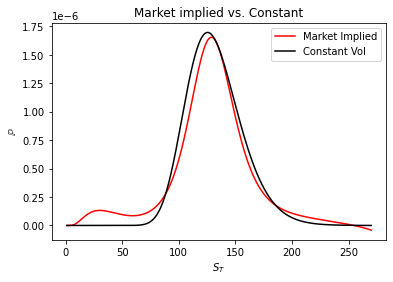

In [46]:
def vol_by_strike(polymdl, K):
    return np.poly1d(polymdl)(K)

binaries = binary_put(S, newK, T, r, newVols)

PsT = []

for i in range(1, len(binaries)):
    p = binaries[i] - binaries[i-1]
    PsT.append(p)

constant_vol = vol_by_strike(poly, S)
binaries_const = binary_put(S, newK, T, r, constant_vol)

const_p = []

for i in range(1, len(binaries_const)):
    p = binaries_const[i] - binaries_const[i-1]
    const_p.append(p)

plt.plot(newK[1:], PsT, color='red', label='Market Implied')
plt.plot(newK[1:], const_p, color='black', label='Constant Vol')
plt.ylabel('$\mathbb{P}$')
plt.xlabel('$S_T$')
plt.legend()
plt.title('Market implied vs. Constant')

Let's now see how we can calculate the probability that the stock is within a certain interval on the expiration date! 

For example, say we want to find the risk-neutral probability of:

$\mathcal{P}(110 \lt {S_T} \lt 140)$

In [47]:
PsT = np.array(PsT)
idx = np.argwhere((newK[1:] <= 140) & (newK[1:] > 110))
PsT[idx].sum()

0.4409622114337573

According to the market, there is a 44.10% chance of the underlying expiring in the interval! 

([<matplotlib.axis.XTick at 0x1d4efbdcb50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

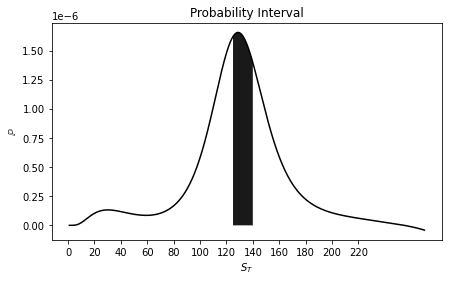

In [48]:
plt.figure(figsize=(7,4))
plt.plot(newK[1:], PsT, color='black')
plt.fill_between(newK[1:], PsT, where=((newK[1:] < 140)& (newK[1:] > 125)),facecolor='black', alpha=0.9)
plt.xlabel('$S_T$')
plt.ylabel('$\mathbb{P}$')
plt.title('Probability Interval')
plt.xticks(np.arange(0,230, 20.0))



# Calculating the Volatility Smile

The vol-smile is related to the fact that options at different strikes have different levels of implied volatility! 

We can look at calculating implied volatility as a minimization problem. 

Let _V_ be the value of a European call or put option

implied volatility = arg min $\vert {V_{market} - V_{BS}(S,K,T,r,\sigma)\vert}$ 

In the example below we will be using scipy's minimize_scalar function to solve for the implied vol. Using _Brent's_ method. This method seems to be more robust than the _Newton implementation_

In [146]:
from scipy.optimize import minimize_scalar
import datetime as dt
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*N(d1)-K* np.exp(-r*T)*N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

def implied_vol(opt_value, S, K, T, r, type_ ='call'):

    def call_obj(sigma):
        return abs(BS_CALL(S,K,T,r,sigma) - opt_value)

    def put_obj(sigma):
        return abs(BS_PUT(S,K,T,r,sigma) - opt_value)
    
    if type_ == 'call':
        res = minimize_scalar(call_obj, bounds=(0.01,6),method='bounded')
        return res.x 
    
    elif type_ == 'put':
        res = minimize_scalar(put_obj, bounds=(0.01,6), method='bounded')
        return res.x
    else: 
        raise ValueError("type_ must be 'put' or 'call'")
    


In [59]:
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.45

C = BS_CALL(S, K, T, r, sigma)
iv = implied_vol(C, S, K, T, r)

iv

0.4499996144569838

In [72]:
#tsla = web.YahooOptions('TSLA')
tsla = yf.Ticker('TSLA')
#calls = tsla._download_options()

opt_ch = tsla.option_chain()
opt_ch[0]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA220603C00200000,2022-06-02 15:19:33+00:00,200.0,573.45,528.15,529.45,0.0,0.0,7.0,18,15.948242,True,REGULAR,USD
1,TSLA220603C00300000,2022-06-02 15:27:01+00:00,300.0,482.70,429.40,431.05,0.0,0.0,54.0,24,11.710452,True,REGULAR,USD
2,TSLA220603C00350000,2022-06-02 19:18:51+00:00,350.0,428.59,378.35,380.35,0.0,0.0,4.0,3,9.670902,True,REGULAR,USD
3,TSLA220603C00400000,2022-06-02 19:18:51+00:00,400.0,378.57,324.60,326.10,0.0,0.0,5.0,101,7.046388,True,REGULAR,USD
4,TSLA220603C00420000,2022-05-27 13:36:56+00:00,420.0,314.70,304.75,306.20,0.0,0.0,1.0,0,6.583498,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,TSLA220603C02050000,2022-05-23 14:16:36+00:00,2050.0,0.01,0.00,0.01,0.0,0.0,5.0,12,5.250003,False,REGULAR,USD
190,TSLA220603C02075000,2022-05-09 14:07:57+00:00,2075.0,0.20,0.00,0.01,0.0,0.0,1.0,4,5.250003,False,REGULAR,USD
191,TSLA220603C02100000,2022-05-23 14:17:09+00:00,2100.0,0.01,0.00,0.01,0.0,0.0,5.0,20,5.375003,False,REGULAR,USD
192,TSLA220603C02125000,2022-05-25 18:45:51+00:00,2125.0,0.01,0.00,0.01,0.0,0.0,1.0,8,5.375003,False,REGULAR,USD


# Merton Jump Diffusion Model 

#### Notation: 
* S = Current price of underlying
* K = Strike
* T = Time to maturity
* $\sigma$ = Annual volatility
* _m_ = Mean of jump size 
* _v_ = Standard deviation of jump size 
* $\lambda$ = Number of jumps per year (intensity)
* dW(t) = Wiener process 
* N(t) = Compound poisson process 
* $V_{BS}$ = Value of option using Black-Scholes 
* $V_{MJD}$ = Value of option using Merton jump diffusion model 

### Jump Diffusion SDE

Merton distinguishes between the following two types of change in stock price: 

* Normal vibrations in in price
* Abnormal vibrations in price

#### Normal vibrations in price
Imbalance between supply and demand etc. These changes are well-suited to be modeled by geometric brownian motion. The integral below is for simulating geometric Brownian motion paths

$\ln(S_T)$ = ln(S) + $\int_0^t (r-\frac{\sigma^2}{2})dt$ + $\int_0^t \sigma dW(t)$

#### Abnormal vibrations in price
Changes that Merton describes as discontinous. Examples of these could be natural disasters, corporate scandals, earnings season or M&A etc. 

$\ln(S_T)$ = ln(S) + $\int_0^t (r-\frac{\sigma^2}{2})dt$ + $\int_0^t \sigma dW(t)$ + $\sum_{j=1}^{N_t} (Q_j - 1)$

Where N(t) is a Poison process with probabiliy of _k_ jumps occuring over the life of the option. $Q_j$ is a log-normally distributed random variable

Text(0.5, 1.0, 'Jump Diffusion Process')

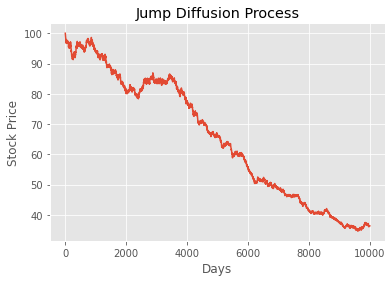

In [90]:
# Simulation of Jump Diffusion
plt.style.use('ggplot')

def merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths):
    size = (steps, Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson(lam*dt,size=size),
                np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r - sigma**2/2 -lam*(m + v**2*0.5))*dt + sigma*np.sqrt(dt) * np.random.normal(size=size)), axis = 0)
        
    return np.exp(geo+poi_rv)*S

S = 100 
T = 1 
r = 0.02 
m = 1
v = 0.3 
lam = 1
steps = 10000
Npaths = 1 
sigma = 0.2 

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

We can assert here that the price for options that follow a jump diffusion process must always be higher than the standard Black-Scholes formula. Since we are adding randomness - which benefit the option holder, options writers should demand a larger premium for assets that follow a jump diffusion process

 - Theses large changes can't be hedged!

### Closed Form Solution 

The summation below takes the Black-Scholes price conditional on knowing exactly how many jumps will occur and weights these values by their corresponding probability under the Poisson distribution.

$V_{MJD} (S, K, T, r, \sigma, m, v, \lambda)$ = $\sum_{}^{} \frac{\exp(-m \lambda T)(m \lambda T)^k}{k!} V_{BS} (S, K, T, r_{n}, \sigma_{k})$

The volatility and drift, conditional on _k_ jumps occurring is given below: 

$\sigma_{k} = \sqrt{\sigma ^2 + k \frac{v^2}{T}}$

$r_{k} = r - \lambda (m-1) + \frac{k \ln (m)}{T}$

In [81]:
# Closed Form solution

def merton_jump_call(S, K, T, r, sigma, m, v, lam):
    p = 0
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m)) / T 
        sigma_k = np.sqrt(sigma**2 + (k*v**2) /T)
        k_fact = np.math.factorial(k)
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact)) * BS_CALL(S, K, T, r_k, sigma_k)
    
    return p

def merton_jump_put(S, K, T, r, sigma, m, v, lam):
    p = 0
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m)) / T 
        sigma_k = np.sqrt(sigma**2 + (k*v**2) /T)
        k_fact = np.math.factorial(k)
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact)) * BS_PUT(S, K, T, r_k, sigma_k)
    
    return p 



Let's compare the closed form solution to a Monte-Carlo simulation. 

Note that we adjust _m_ to be: $\exp^{m + \frac{v^2}{2}}$ so we can compare the numbers we get from the Monte-Carlo with Merton's formula! 

In [84]:
# Monte-Carlo simulation 
steps_mc = 255
Npaths_mc = 200000 
sigma_mc = 0.2 
K = 100
np.random.seed(3)
j = merton_jump_paths(S, T, r, sigma_mc, lam, m, v, steps_mc, Npaths_mc)

mcprice = np.maximum(j[-1]-K,0).mean() * np.exp(-r*T)

cf_price = merton_jump_call(S, K, T, r, sigma_mc, np.exp(m+v**2*0.5), v, lam)

print(f'Merton price = {cf_price}')
print(f'Monte Carlo price = {mcprice}')
print(f'Black-Scholes price = {BS_CALL(S, K, T, r, sigma)}')

Merton price = 14.500570058304778
Monte Carlo price = 14.597509592911369
Black-Scholes price = 8.916037278572539


### Volatility smile from Merton's model

We create artificial data and investigate if the model produces a volatility smile using artificial data and the closed form solution! 

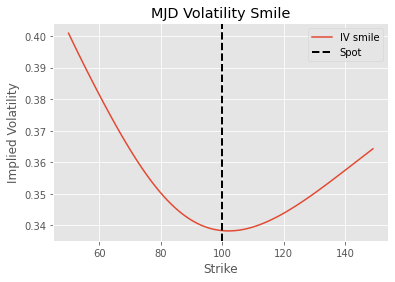

In [92]:
strikes = np.arange(50,150,1)

mjd_prices = merton_jump_call(S, strikes, T, r, sigma, m,v, lam)
merton_ivs = [implied_vol(c, S, k, T, r) for c,k in zip(mjd_prices, strikes)]

plt.plot(strikes, merton_ivs, label = 'IV smile')
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.axvline(S, color='black', linestyle='dashed', linewidth=2, label='Spot')
plt.title('MJD Volatility Smile')
plt.legend()

### Model Calibration to Market Prices 

Uses least squares to fit the closed form solution to market data. 

$\min\limits_{\sigma, m, v, \lambda} \sum(V_{mkt} - V_{MJD}(S, K_{n}, T, r, \sigma, m, v, \lambda))^2$

subject to: 

$0 \lt \sigma \lt \infty$ \
$0 \lt m \lt 2$ \
$0 \lt v \lt \infty$ \
$0 \leq \lambda \lt 5$

These bounds are used since the mean of the jump shouldn't be more/less than +/- 100%

The variance is strictly positive 

The number of jumps should be less than 5

In [99]:
import time
from scipy.optimize import minimize 

df = pd.read_csv('https://raw.githubusercontent.com/codearmo/data/master/calls_calib_example.csv')

def optimal_params(x, mkt_prices, strikes):
    candidate_prices = merton_jump_call(S, strikes, T_t, r, sigma=x[0], m=x[1], v=x[2], lam=x[3])
    return np.linalg.norm(mkt_prices - candidate_prices, 2)

T_t = df['T'].values[0]
S = df.F.values[0]
r = 0
x0 = [0.15, 1, 0.1, 1] #Initial guesses for the algorithm
bounds = ((0.01, np.inf), (0.01, 2), (1e-5, np.inf), (0,5))
strikes = df.Strike.values 
prices = df.Midpoint.values 

res = minimize(optimal_params, method='SLSQP', x0=x0, args=(prices, strikes), bounds=bounds, tol=1e-20,options={"maxiter":1000})

sigt = res.x[0]
mt = res.x[1]
vt = res.x[2]
lamt = res.x[3]

print(f'Calibrated Volatility: {sigt}')
print(f'Calibrated Jump Mean: {mt}')
print(f'Calibrated Jump Std: {vt}')
print(f'Calibrated intensity: {lamt}')

c:\Projekter\py_venv\.venv\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Calibrated Volatility: 0.06489457400049325
Calibrated Jump Mean: 0.8789054918834592
Calibrated Jump Std: 0.15420421484229918
Calibrated intensity: 0.9722978852848275


Text(0.5, 1.0, 'Merton Model Optimal Params')

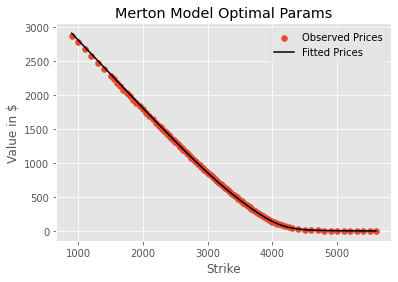

In [100]:
#Now we can reprice the options using these calibrated optimal parameters and plot against observed prices

df['least_sq_v'] = merton_jump_call(S, df.Strike, df['T'], 0, sigt, mt, vt, lamt)

plt.scatter(df.Strike, df.Midpoint, label='Observed Prices')
plt.plot(df.Strike, df.least_sq_v, color='black', label='Fitted Prices')
plt.legend()
plt.xlabel('Strike')
plt.ylabel('Value in $')
plt.title('Merton Model Optimal Params')

# Heston Model Simulation with Python

A useful model for simulating stochastic volatility and its effect on the potential paths an asset can take over the life of an option

The Heston model allows modelling the statistical dependence between the asset returns and the volatility which have been empirically shown to have an inverse relationship

### Heston Model SDE

The SDE shown here are similar to standard GBM apart from the fact that the volatility is a stochastic, mean-reverting process. 

$dS_{t} = \mu S_{t} dt + \sqrt{v_t} S_{t} dW_{t}^S$

$dv_{t} = \kappa(\theta - v_{t}) dt + \xi \sqrt{v_t} dW_{t}^v$

$dW_{t}^S$ and $dW_{t}^v$ are wiener processes with instantaneous correlation $\rho$

$\mu$ = drift term \
$\theta$ = long run average variance \
$\kappa$ = rate of mean reversion \
$\xi$ = vol of vol

### Generating Correlated Random Normal Variables 

To simulate Heston paths we first need to examine how to generate correlated random variables in Python. 

Let $\Sigma$ be the covariance matrix between two random normal variables

And the means for each random variable shown as the vecor $\mu$

$\Sigma = \begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix}$

$\mu = \begin{pmatrix} \mu_{1} \\ \mu_{2} \end{pmatrix}$

We can then draw from the following distribution: 

$W_{t} \backsim \mathcal{N} (\mu, \Sigma)$

array([[ 1.        , -0.70810463],
       [-0.70810463,  1.        ]])

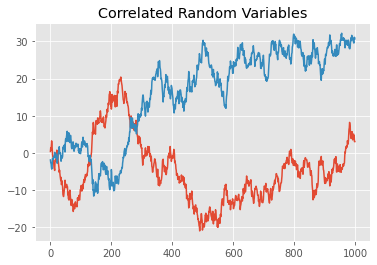

In [135]:
# Generating data

rho = -0.70 
Ndraws = 1000 
mu = np.array([0,0])
cov = np.array([[1, rho], [rho, 1]])

W = np.random.multivariate_normal(mu, cov, size=Ndraws)

plt.plot(W.cumsum(axis=0))
plt.title('Correlated Random Variables')

#check if desired relationship was created statistically
np.corrcoef(W.T)

### Properties of volatility

#### Mean Reversion

Volatility never jumps without eventually returning to a certain level

$\theta = long-run vol.^2$

The rate at which it is pulled towards this long-term variance is $\kappa$ 

#### Clustering 
Relates to the fact that if volatility is high today it is likely it will be high tomorrow and vice versa for low volatility periods. 

In technical terms, this means the volatility of a stock exhibits autocorrelation

### Simulating a Heston process

Essentially here we are just simulating a standard geometric Brownian motion with non-constant volatility, where the change in S has relationship $\rho$ with the change in volatility

Here we set the drift term $\mu$ to equal the risk-free rate _r_ 

$S_{t+i} = S_{t} \exp^{(r-\frac{v_{t}}{2})dt} + \sqrt{v_{i}}dW_{t}^{S}$

$v_{t+1} = v_{t} + \kappa (\theta - v_{t})dt + \xi\sqrt{v_{t}}dW_{t}^{v}$

Clearly we need to decide on an initial value of $v_{0}$ which possibly could be estimated by using a 30 period window

The initial value for $S_{0}$ is obviously just the price we observe currently in the market

We are assuring that _v_ is strictly positive as negative variance values aren't logical

In [170]:
def generate_heston_path(S, T, r, kappa, theta, v_0, rho, xi, steps, Npaths, return_vol=False):

    dt = T/steps 
    size = (Npaths, steps)
    prices = np.zeros(size) 
    sigs = np.zeros(size)
    S_t = S 
    v_t = v_0 
    for t in range(steps):
        WT = np.random.multivariate_normal(np.array([0,0]), 
                                                cov = np.array([[1,rho], [rho,1]]),
                                                size=paths)* np.sqrt(dt)

        S_t = S_t*(np.exp((r-0.5*v_t)*dt + np.sqrt(v_t)*WT[:,0]))
        v_t = np.abs(v_t + kappa*(theta - v_t)*dt + xi*np.sqrt(v_t)*WT[:,1])
        prices[:,t] = S_t 
        sigs[:,t] = v_t 
    
    if return_vol:
        return prices,sigs 
    return prices


kappa = 3
theta = 0.02 
v_0 = 0.02 
xi = 0.9 
r = 0.02 
S = 100 
#paths = 50000 
steps = 10000 
T = 1 

# prices_pos = generate_heston_path(S, T, r, kappa, theta, v_0, rho=0.9, xi=xi, steps=steps, Npaths = paths, return_vol=False)[:,-1]

# prices_neg = generate_heston_path(S, T, r, kappa, theta, v_0, rho=-0.45, xi=xi, steps=steps, Npaths = paths, return_vol=False)[:,-1]

# gbm_bench = S*np.exp(np.random.normal((r-v_0/2)*T, np.sqrt(theta)*np.sqrt(T), size=paths))



In [171]:
#plotting paths of Heston processes

# kappa_k = 3 
# theta_k = 0.04
# v_0_k = 0.04
# xi_k = 0.6 
# r_k = 0.05 
# S_k = 100 
# paths_k = 3 
# steps_k = 10000 
# T_k = 1 
# rho_k = -0.8 

prices, sigs = generate_heston_path(S, T, r, kappa, theta, v_0, rho=rho, xi=xi, steps=steps, Npaths=3, return_vol=True)

plt.figure(figsize=(7,6))
plt.plot(prices.T)
plt.title('Heston Price Paths Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Underlying Price')
plt.show() 

plt.figure(figsize=(7,6))
plt.plot(np.sqrt(sigs).T)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.legend(fontsize=15)
plt.show()

ValueError: could not broadcast input array from shape (50000,) into shape (3,)

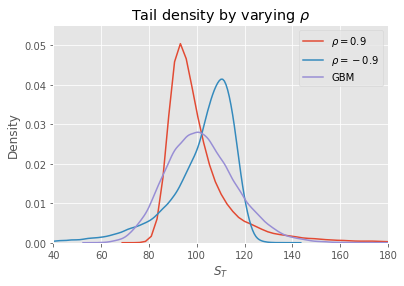

In [142]:
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.kdeplot(data = prices_pos, label=r"$\rho = 0.9$", ax=ax)
ax = sns.kdeplot(data = prices_neg, label=r"$\rho = -0.9$", ax=ax)
ax = sns.kdeplot(data = gbm_bench, label="GBM", ax=ax)

ax.set_title(r'Tail density by varying $\rho$')
plt.axis([40, 180, 0, 0.055])
plt.xlabel('$S_T$')
plt.ylabel('Density')
plt.legend()

#### Pricing options with Heston Model

Here we are pricing options for a range of strikes using the simulated prices above! 

Pricing a chain of puts between 30-200$ and investigate whether we get a volatility smile

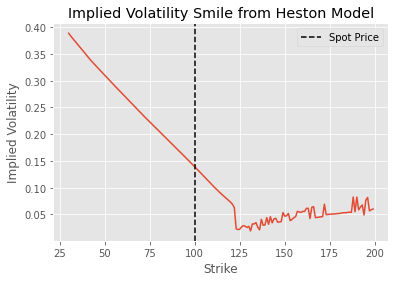

In [148]:
strikes = np.arange(30, 200, 1)

puts = [] 

for K in strikes: 
    P = np.mean(np.maximum(K-prices_neg, 0))*np.exp(-r*T)
    puts.append(P)

ivs = [implied_vol(P, S, K, T, r, type_ = 'put') for P, K in zip(puts, strikes)]

plt.plot(strikes, ivs)
plt.ylabel('Implied Volatility')
plt.xlabel('Strike')
plt.axvline(S, color='black', linestyle='--', label='Spot Price')
plt.title('Implied Volatility Smile from Heston Model')
plt.legend()

The Heston model is an improvement on the Black-Scholes model, due to the ability to model volatility as a mean-reverting random variable